# 노블엠앤비 모델데이터 만들기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import timedelta

## 주가, 시가총액: df_ct_pp

In [3]:
df_ct_pp = pd.read_csv('./data/노블엠앤비_시세추이.csv',encoding='cp949')
df_ct_pp
df_ct_pp['일자'] = pd.to_datetime(df_ct_pp['일자'])
df_ct_pp = df_ct_pp.sort_values(by='일자')
df_ct_pp

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
1474,2016-01-04,10450,250,2.45,10000,10750,10000,672835,6967962350,180337029400,17257132
1473,2016-01-05,11050,600,5.74,10100,11350,10050,864534,9268313550,190691308600,17257132
1472,2016-01-06,12400,1350,12.22,11250,13300,11200,1828806,22040722450,213988436800,17257132
1471,2016-01-07,11000,-1400,-11.29,12800,14000,10900,2261851,28771179200,189828452000,17257132
1470,2016-01-08,11500,500,4.55,11050,12050,10750,1041652,11926285950,198457018000,17257132
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-12-24,3405,40,1.19,3390,3485,3330,61097,208599825,75934111635,22300767
3,2021-12-27,3315,-90,-2.64,3460,3460,3290,52981,176568725,73927042605,22300767
2,2021-12-28,3210,-105,-3.17,3310,3310,2985,252822,790860260,71585462070,22300767
1,2021-12-29,3280,70,2.18,3215,3350,3160,60462,199174815,73146515760,22300767


In [4]:
df_ct_pp = df_ct_pp.set_index('일자')
df_ct_pp1 = df_ct_pp.loc['2016-01':'2021-12']
df_ct_pp.reset_index(inplace=True)

In [5]:
df_ct_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1475 non-null   datetime64[ns]
 1   종가      1475 non-null   int64         
 2   대비      1475 non-null   int64         
 3   등락률     1475 non-null   float64       
 4   시가      1475 non-null   int64         
 5   고가      1475 non-null   int64         
 6   저가      1475 non-null   int64         
 7   거래량     1475 non-null   int64         
 8   거래대금    1475 non-null   int64         
 9   시가총액    1475 non-null   int64         
 10  상장주식수   1475 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 126.9 KB


## 재무비율

In [6]:
df_ct_hts = pd.read_csv('./data/노블엠앤비_hts재무비율.csv',encoding='cp949',index_col=0).T
df_ct_hts = df_ct_hts.loc['2015/12':]
df_ct_hts

,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),...,지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),DPS(원),PER(배),PBR(배),발행주식수,배당수익률(%)
2015/12,"10,200",200,-65,-24,-23,"1,618",751,867,86,86.61,...,-11.34,-6.14,-12.18,"-1,316","47,546",0,NaN,3.15,"1,726",0.00
2016/03,"7,150",168,-38,-42,-37,"1,746",694,"1,051",98,66.06,...,-21.98,-10.01,-16.65,"-1,937","51,785",0,NaN,2.03,"1,966",0.00
2016/06,"6,640",165,-30,-102,-98,"1,671",694,977,101,71.05,...,-59.65,-23.96,-41.54,"-4,853","44,764",0,NaN,2.18,"2,028",0.00
2016/09,"5,400",160,-52,-47,-42,"1,590",644,946,103,68.04,...,-26.16,-11.51,-18.53,"-2,020","44,704",0,NaN,1.78,"2,067",0.00
2016/12,"3,615",144,-109,-295,-302,"1,241",561,680,103,82.53,...,-210.10,-83.48,-161.56,"-14,600","29,043",0,NaN,1.83,"2,067",0.00
2017/03,"3,055",142,-44,-49,-47,"1,118",407,712,118,57.16,...,-33.00,-16.48,-30.08,"-2,192","27,467",0,NaN,1.64,"2,360",0.00
2017/06,"2,840",130,-40,-114,-101,"1,033",471,562,118,83.91,...,-78.06,-42.46,-70.29,"-4,293","21,392",0,NaN,1.95,"2,360",0.00
2017/09,"1,610",176,-30,-46,-43,"1,215",546,669,159,81.53,...,-24.46,-16.48,-30.46,"-1,812","19,734",0,NaN,1.20,"3,176",0.00
2017/12,"1,475",155,-48,-52,-50,"1,182",576,605,172,95.18,...,-32.53,-17.27,-33.74,"-1,468","16,553",0,NaN,1.31,"3,434",0.00
2018/03,"1,425",145,-37,-53,-46,"1,145",537,608,172,88.33,...,-31.77,-18.12,-32.17,"-1,345","16,907",0,NaN,1.24,"3,434",0.00


In [8]:
# 제거해주기(적자기업이므로 PER제거)
df_ct_hts.drop(columns= ['유보율(%)','DPS(원)','배당수익률(%)','PER(배)'], inplace=True)

In [9]:
# 인덱스 날짜로 바꿔주기

df_ct_hts = df_ct_hts.reset_index()
df_ct_hts = df_ct_hts.rename(columns={'index':'일자'})
df_ct_hts.head()

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015/12,"10,200",200,-65,-24,-23,"1,618",751,867,86,86.61,-32.70,-11.34,-6.14,-12.18,"-1,316","47,546",3.15,"1,726"
1,2016/03,"7,150",168,-38,-42,-37,"1,746",694,"1,051",98,66.06,-22.32,-21.98,-10.01,-16.65,"-1,937","51,785",2.03,"1,966"
2,2016/06,"6,640",165,-30,-102,-98,"1,671",694,977,101,71.05,-18.26,-59.65,-23.96,-41.54,"-4,853","44,764",2.18,"2,028"
3,2016/09,"5,400",160,-52,-47,-42,"1,590",644,946,103,68.04,-32.47,-26.16,-11.51,-18.53,"-2,020","44,704",1.78,"2,067"
4,2016/12,"3,615",144,-109,-295,-302,"1,241",561,680,103,82.53,-75.75,-210.10,-83.48,-161.56,"-14,600","29,043",1.83,"2,067"


In [10]:
# 데이터타입 날짜형으로 바꿔주기
df_ct_hts['일자'] = pd.to_datetime(df_ct_hts['일자'])

# 데이터타입 숫자형으로 바꿔주기

for col in df_ct_hts.columns[1:]:
        df_ct_hts[col] = df_ct_hts[col].apply(lambda x: x.replace(',',''))
        df_ct_hts[col] = df_ct_hts[col].apply(pd.to_numeric)

In [11]:
df_ct_hts.head(3)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-01,10200,200,-65,-24,-23,1618,751,867,86,86.61,-32.70,-11.34,-6.14,-12.18,-1316,47546,3.15,1726
1,2016-03-01,7150,168,-38,-42,-37,1746,694,1051,98,66.06,-22.32,-21.98,-10.01,-16.65,-1937,51785,2.03,1966
2,2016-06-01,6640,165,-30,-102,-98,1671,694,977,101,71.05,-18.26,-59.65,-23.96,-41.54,-4853,44764,2.18,2028


In [12]:
# 결산일 = 3,6,9,12월 마지막일
df_ct_hts['일자'] = df_ct_hts['일자'].apply(lambda x: x + timedelta(29)) 

In [13]:
df_ct_hts.head(5)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,10200,200,-65,-24,-23,1618,751,867,86,86.61,-32.70,-11.34,-6.14,-12.18,-1316,47546,3.15,1726
1,2016-03-30,7150,168,-38,-42,-37,1746,694,1051,98,66.06,-22.32,-21.98,-10.01,-16.65,-1937,51785,2.03,1966
2,2016-06-30,6640,165,-30,-102,-98,1671,694,977,101,71.05,-18.26,-59.65,-23.96,-41.54,-4853,44764,2.18,2028
3,2016-09-30,5400,160,-52,-47,-42,1590,644,946,103,68.04,-32.47,-26.16,-11.51,-18.53,-2020,44704,1.78,2067
4,2016-12-30,3615,144,-109,-295,-302,1241,561,680,103,82.53,-75.75,-210.10,-83.48,-161.56,-14600,29043,1.83,2067


## 재무비율 날짜 전처리

In [14]:
# '2015-12-01' ~'2022-04-30' 날짜만
ser_date1 = pd.date_range('2015-12-30','2021-12-31')
df_date1 = pd.DataFrame({'일자': ser_date1})
df_date1[:5]

,일자
0,2015-12-30
1,2015-12-31
2,2016-01-01
3,2016-01-02
4,2016-01-03


In [15]:
# 일단 모든 날짜 채우기
df_ct_hts1 = pd.merge(df_date1, df_ct_hts, on='일자', how='left')
df_ct_hts1.head(5)

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,10200.0,200.0,-65.0,-24.0,-23.0,1618.0,751.0,867.0,86.0,86.61,-32.7,-11.34,-6.14,-12.18,-1316.0,47546.0,3.15,1726.0
1,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Nan값 의 데이터로 채우기: 발표된 데이터가 과거값

df_ct_hts1 = df_ct_hts1.fillna(method='bfill')
df_ct_hts1

,일자,주가(원),매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),자본총계(억원),자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2015-12-30,10200.0,200.0,-65.0,-24.0,-23.0,1618.0,751.0,867.0,86.0,86.61,-32.70,-11.34,-6.14,-12.18,-1316.0,47546.0,3.15,1726.0
1,2015-12-31,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
2,2016-01-01,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
3,2016-01-02,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
4,2016-01-03,7150.0,168.0,-38.0,-42.0,-37.0,1746.0,694.0,1051.0,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2021-12-27,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
2190,2021-12-28,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
2191,2021-12-29,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
2192,2021-12-30,3130.0,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,444.0,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0


## 시가총액 데이터와 합치기

In [17]:
df_ct = pd.merge(df_ct_pp,df_ct_hts1, on='일자', how='left')
df_ct = df_ct.iloc[:1475]
df_ct

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,자본금(억원),부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),EPS(원),BPS(원),PBR(배),발행주식수
0,2016-01-04,10450,250,2.45,10000,10750,10000,672835,6967962350,180337029400,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
1,2016-01-05,11050,600,5.74,10100,11350,10050,864534,9268313550,190691308600,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
2,2016-01-06,12400,1350,12.22,11250,13300,11200,1828806,22040722450,213988436800,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
3,2016-01-07,11000,-1400,-11.29,12800,14000,10900,2261851,28771179200,189828452000,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
4,2016-01-08,11500,500,4.55,11050,12050,10750,1041652,11926285950,198457018000,...,98.0,66.06,-22.32,-21.98,-10.01,-16.65,-1937.0,51785.0,2.03,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,3405,40,1.19,3390,3485,3330,61097,208599825,75934111635,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
1471,2021-12-27,3315,-90,-2.64,3460,3460,3290,52981,176568725,73927042605,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
1472,2021-12-28,3210,-105,-3.17,3310,3310,2985,252822,790860260,71585462070,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0
1473,2021-12-29,3280,70,2.18,3215,3350,3160,60462,199174815,73146515760,...,223.0,146.52,9.48,13.68,-12.18,-15.18,-74.0,2173.0,1.44,22301.0


## 캔들차트 모양

In [18]:
# 고가 - 종가
df_ct['고가-종가'] = df_ct['고가'] - df_ct['종가']

# 고가 - 시가
df_ct['고가-시가'] = df_ct['고가'] - df_ct['시가']

# 고가 - 저가
df_ct['고가-저가'] = df_ct['고가'] - df_ct['저가']

# 종가 - 시가
df_ct['종가-시가'] = df_ct['종가'] - df_ct['시가']

# 종가 - 저가
df_ct['종가-저가'] = df_ct['종가'] - df_ct['저가']

# 시가 - 저가
df_ct['시가-저가'] = df_ct['시가'] - df_ct['저가']

## 전환사채 전환액

In [19]:
df_kind = pd.read_csv('./data/전환사채.csv',index_col=0)
df_kind['상장(예정)일'] = pd.to_datetime(df_kind['상장(예정)일'])
df_kind = df_kind.rename(columns={'상장(예정)일': '일자'})
df_kind['발행주식수'] = pd.to_numeric(df_kind['발행주식수'])
df_kind['액면가'] = pd.to_numeric(df_kind['액면가'],errors='coerce')
df_kind.dropna(inplace=True)
df_kind['전환사채전환총액'] = df_kind['발행주식수'] * df_kind['액면가']
df_kind.head()

,회사명,일자,상장방식,발행주식수,액면가,발행사유,전환사채전환총액
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환,7.160120e+08
1,바이온,2022-05-06,변경상장,-33450389.0,500.0,감자(무상),-1.672519e+10
2,초록뱀미디어,2022-05-06,추가상장,100000.0,500.0,주식매수선택권행사,5.000000e+07
3,트루윈,2022-05-06,추가상장,22428.0,500.0,국내공모 신주인수권부사채 신주인수권 행사,1.121400e+07
4,로보티즈,2022-05-06,추가상장,10000.0,500.0,주식매수선택권행사,5.000000e+06


In [20]:
df_ct_cb = df_kind[df_kind['회사명']=='노블엠앤비']
df_ct_cb = df_ct_cb[df_ct_cb['발행사유'].str.contains('전환사채')]
df_ct_cb = df_ct_cb.sort_values(by='일자',ascending=True)
df_ct_cb = df_ct_cb.set_index('일자')
df_ct_cb

,회사명,상장방식,발행주식수,액면가,발행사유,전환사채전환총액
일자,,,,,,
2015-12-29,노블엠앤비,추가상장,3170304.0,500.0,국내사모 전환사채 전환,1.585152e+09
2016-02-24,노블엠앤비,추가상장,57100.0,500.0,국내사모 전환사채 전환,2.855000e+07
2016-06-10,노블엠앤비,추가상장,372920.0,500.0,국내사모 전환사채 전환,1.864600e+08
2016-06-17,노블엠앤비,추가상장,179565.0,500.0,국내사모 전환사채 전환,8.978250e+07
2016-07-15,노블엠앤비,추가상장,164367.0,500.0,국내사모 전환사채 전환,8.218350e+07
2016-07-19,노블엠앤비,추가상장,93230.0,500.0,국내사모 전환사채 전환,4.661500e+07
2016-07-21,노블엠앤비,추가상장,198211.0,500.0,국내사모 전환사채 전환,9.910550e+07
2017-12-15,노블엠앤비,추가상장,1635111.0,500.0,국내사모 전환사채 전환,8.175555e+08
2017-12-21,노블엠앤비,추가상장,946643.0,500.0,국내사모 전환사채 전환,4.733215e+08


In [21]:
df_ct_cb = df_ct_cb.reset_index()
df_ct_cb1 = df_ct_cb[['일자','전환사채전환총액']]

In [22]:
df_ct_cb1

,일자,전환사채전환총액
0,2015-12-29,1.585152e+09
1,2016-02-24,2.855000e+07
2,2016-06-10,1.864600e+08
3,2016-06-17,8.978250e+07
4,2016-07-15,8.218350e+07
5,2016-07-19,4.661500e+07
6,2016-07-21,9.910550e+07
7,2017-12-15,8.175555e+08
8,2017-12-21,4.733215e+08
9,2018-05-30,2.450979e+09


In [23]:
df_ct1 = pd.merge(df_ct,df_ct_cb1, on='일자', how= 'left')
df_ct1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,BPS(원),PBR(배),발행주식수,고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,10450,250,2.45,10000,10750,10000,672835,6967962350,180337029400,...,51785.0,2.03,1966.0,300,750,750,450,450,0,NaN
1,2016-01-05,11050,600,5.74,10100,11350,10050,864534,9268313550,190691308600,...,51785.0,2.03,1966.0,300,1250,1300,950,1000,50,NaN
2,2016-01-06,12400,1350,12.22,11250,13300,11200,1828806,22040722450,213988436800,...,51785.0,2.03,1966.0,900,2050,2100,1150,1200,50,NaN
3,2016-01-07,11000,-1400,-11.29,12800,14000,10900,2261851,28771179200,189828452000,...,51785.0,2.03,1966.0,3000,1200,3100,-1800,100,1900,NaN
4,2016-01-08,11500,500,4.55,11050,12050,10750,1041652,11926285950,198457018000,...,51785.0,2.03,1966.0,550,1000,1300,450,750,300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2021-12-24,3405,40,1.19,3390,3485,3330,61097,208599825,75934111635,...,2173.0,1.44,22301.0,80,95,155,15,75,60,NaN
1472,2021-12-27,3315,-90,-2.64,3460,3460,3290,52981,176568725,73927042605,...,2173.0,1.44,22301.0,145,0,170,-145,25,170,NaN
1473,2021-12-28,3210,-105,-3.17,3310,3310,2985,252822,790860260,71585462070,...,2173.0,1.44,22301.0,100,0,325,-100,225,325,NaN
1474,2021-12-29,3280,70,2.18,3215,3350,3160,60462,199174815,73146515760,...,2173.0,1.44,22301.0,70,135,190,65,120,55,NaN


In [24]:
df_ct1.isnull().sum()

일자                0
종가                0
대비                0
등락률               0
시가                0
고가                0
저가                0
거래량               0
거래대금              0
시가총액              0
상장주식수             0
주가(원)             0
매출액(억원)           0
영업이익(억원)          0
당기순이익(억원)         0
지배주주순이익(억원)       0
자산총계(억원)          0
부채총계(억원)          0
자본총계(억원)          0
자본금(억원)           0
부채비율(%)           0
영업이익률(%)          0
지배주주순이익률(%)       0
ROA(%)            0
ROE(%)            0
EPS(원)            0
BPS(원)            0
PBR(배)            0
발행주식수             0
고가-종가             0
고가-시가             0
고가-저가             0
종가-시가             0
종가-저가             0
시가-저가             0
전환사채전환총액       1442
dtype: int64

In [25]:
# 전환사채전환총액 : 발행된 전환사채가 과거값
df_ct1 = df_ct1.fillna(method='bfill')
df_ct1 = df_ct1.fillna(6.178500e+07)

In [26]:
df_ct1

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,BPS(원),PBR(배),발행주식수,고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,10450,250,2.45,10000,10750,10000,672835,6967962350,180337029400,...,51785.0,2.03,1966.0,300,750,750,450,450,0,28550000.0
1,2016-01-05,11050,600,5.74,10100,11350,10050,864534,9268313550,190691308600,...,51785.0,2.03,1966.0,300,1250,1300,950,1000,50,28550000.0
2,2016-01-06,12400,1350,12.22,11250,13300,11200,1828806,22040722450,213988436800,...,51785.0,2.03,1966.0,900,2050,2100,1150,1200,50,28550000.0
3,2016-01-07,11000,-1400,-11.29,12800,14000,10900,2261851,28771179200,189828452000,...,51785.0,2.03,1966.0,3000,1200,3100,-1800,100,1900,28550000.0
4,2016-01-08,11500,500,4.55,11050,12050,10750,1041652,11926285950,198457018000,...,51785.0,2.03,1966.0,550,1000,1300,450,750,300,28550000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2021-12-24,3405,40,1.19,3390,3485,3330,61097,208599825,75934111635,...,2173.0,1.44,22301.0,80,95,155,15,75,60,61785000.0
1472,2021-12-27,3315,-90,-2.64,3460,3460,3290,52981,176568725,73927042605,...,2173.0,1.44,22301.0,145,0,170,-145,25,170,61785000.0
1473,2021-12-28,3210,-105,-3.17,3310,3310,2985,252822,790860260,71585462070,...,2173.0,1.44,22301.0,100,0,325,-100,225,325,61785000.0
1474,2021-12-29,3280,70,2.18,3215,3350,3160,60462,199174815,73146515760,...,2173.0,1.44,22301.0,70,135,190,65,120,55,61785000.0


## 안쓰는 열 빼기 : df_ct2 

In [27]:
df_ct1.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수', '주가(원)', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)', '지배주주순이익(억원)',
       '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)', '영업이익률(%)',
       '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)', 'PBR(배)',
       '발행주식수', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [28]:
len(df_ct1.columns)

36

In [29]:
df_ct2 = df_ct1.drop(columns= ['대비','시가', '고가', '저가','거래량','시가총액', '상장주식수', '주가(원)','발행주식수'])
df_ct2

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,10450,2.45,6967962350,168.0,-38.0,-42.0,-37.0,1746.0,694.0,...,-1937.0,51785.0,2.03,300,750,750,450,450,0,28550000.0
1,2016-01-05,11050,5.74,9268313550,168.0,-38.0,-42.0,-37.0,1746.0,694.0,...,-1937.0,51785.0,2.03,300,1250,1300,950,1000,50,28550000.0
2,2016-01-06,12400,12.22,22040722450,168.0,-38.0,-42.0,-37.0,1746.0,694.0,...,-1937.0,51785.0,2.03,900,2050,2100,1150,1200,50,28550000.0
3,2016-01-07,11000,-11.29,28771179200,168.0,-38.0,-42.0,-37.0,1746.0,694.0,...,-1937.0,51785.0,2.03,3000,1200,3100,-1800,100,1900,28550000.0
4,2016-01-08,11500,4.55,11926285950,168.0,-38.0,-42.0,-37.0,1746.0,694.0,...,-1937.0,51785.0,2.03,550,1000,1300,450,750,300,28550000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2021-12-24,3405,1.19,208599825,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,...,-74.0,2173.0,1.44,80,95,155,15,75,60,61785000.0
1472,2021-12-27,3315,-2.64,176568725,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,...,-74.0,2173.0,1.44,145,0,170,-145,25,170,61785000.0
1473,2021-12-28,3210,-3.17,790860260,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,...,-74.0,2173.0,1.44,100,0,325,-100,225,325,61785000.0
1474,2021-12-29,3280,2.18,199174815,-84.0,-8.0,-26.0,-12.0,1096.0,651.0,...,-74.0,2173.0,1.44,70,135,190,65,120,55,61785000.0


In [30]:
# 거래대금, 전환사채전환총액 -> 억 단위로 바꿔주기

# df_ct2['거래대금'] = df_ct2['거래대금'].apply(lambda x: x/100000000)
# df_ct2['전환사채전환총액'] = df_ct2['전환사채전환총액'].apply(lambda x: x/100000000)

In [31]:
df_ct3 = df_ct2.copy()

In [34]:
# df_ct3.to_csv('./data/노블엠앤비_변동률전.csv')

## 변동률로 바꾸기

In [35]:
df_ct3 = pd.read_csv('./data/시티랩스_변동률전.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,0.67,3952030070,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,115,85,125,-30,10,40,1.106194e+09
1,2016-01-05,3020,0.00,2165452785,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,10,70,100,60,90,30,1.106194e+09
2,2016-01-06,2895,-4.14,2798725660,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,170,65,225,-105,55,160,1.106194e+09
3,2016-01-07,2945,1.73,5158706170,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,155,235,260,80,105,25,1.106194e+09
4,2016-01-08,2920,-0.85,2341933860,87.0,-3.0,-2.0,-2.0,442.0,201.0,...,-14.0,1595.0,1.88,20,40,185,20,165,145,1.106194e+09


### 영업이익 0값변경

In [36]:
# 변동률 계산시 2019-04-02 부터 2019-06-28 까지 Nan값 생성됨
df_ct3[['영업이익(억원)','일자']].set_index('일자').loc['2019-03-28': '2019-07-05']

,영업이익(억원)
일자,
2019-03-28,-8.0
2019-03-29,-8.0
2019-04-01,0.0
2019-04-02,0.0
2019-04-03,0.0
...,...
2019-07-01,-5.0
2019-07-02,-5.0
2019-07-03,-5.0


(array([ 61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  57.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120.,   0.,
         61., 125.,   0., 187., 183.,  59.,   0.,  62.,  62.,   0., 185.,
          0.,   0.,   0.,   0.,   0.,  64.,   0.,  60.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.,   0.,   0.,
         64.]),
 array([-58.  , -57.22, -56.44, -55.66, -54.88, -54.1 , -53.32, -52.54,
        -51.76, -50.98, -50.2 , -49.42, -48.64, -47.86, -47.08, -46.3 ,
        -45.52, -44.74, -43.96, -43.18, -42.4 , -41.62, -40.84, -40.06,
        -39.28, -38.5 , -37.72, -36.94, -36.16, -35.38, -34.6 , -33.82,
        -33.04, -32.26, -31.48

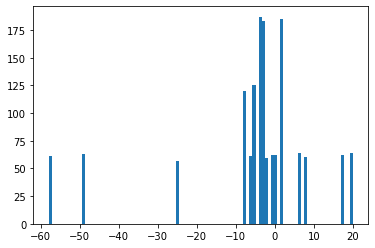

In [37]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct3['영업이익(억원)'], bins=100)

In [38]:
zeros = np.where(df_ct3['영업이익(억원)'] == 0)
zeros

(array([792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804,
        805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817,
        818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
        831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
        844, 845, 846, 847, 848, 849, 850, 851, 852, 853], dtype=int64),)

In [39]:
for idx in zeros:
    df_ct3['영업이익(억원)'].iloc[idx]= -1 

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
np.where(df_ct3['영업이익(억원)'] == 0)

(array([], dtype=int64),)

### 캔들차트 0값변경

(array([727., 281., 130., 103.,  57.,  41.,  39.,  26.,  14.,   3.,  13.,
          9.,   2.,   3.,   1.,   2.,   2.,   1.,   2.,   2.,   2.,   1.,
          1.,   0.,   5.,   0.,   2.,   0.,   0.,   1.,   2.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,   28.2,   56.4,   84.6,  112.8,  141. ,  169.2,  197.4,
         225.6,  253.8,  282. ,  310.2,  338.4,  366.6,  394.8,  423. ,
         451.2,  479.4,  507.6,  535.8,  564. ,  592.2,  620.4,  648.6,
         676.8,  705. ,  733.2,  761.4,  789.6,  817.8,  846. ,  874.2,
         902.4,  930.6,  958.8,  987. , 1015.2, 1043.4, 1071.6, 1099.8,
        1128. , 1156.2, 1184.4, 1212.6, 1240.8, 1269. , 1297.2, 1325.4,
        1353.6, 1381.8, 1410. ]),
 <BarContainer object of 50 artists>)

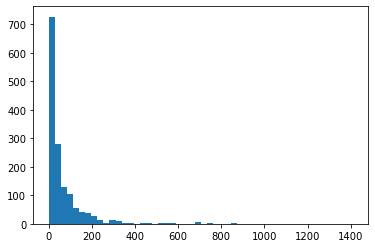

In [41]:
# 0값 -> -1값으로 변경결정
plt.hist(df_ct3['고가-시가'], bins=50)

In [42]:
candle = ['고가-종가','고가-시가','고가-저가', '종가-시가','종가-저가','시가-저가']

In [43]:
for can in candle:
    idxs = np.where(df_ct3[can] == 0)
    for idx in idxs:
        df_ct3[can].iloc[idx]= 1    

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 변동률 적용하기

In [44]:
df_ct3.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [45]:
df_ct3.columns

Index(['일자', '종가', '등락률', '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
       '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [46]:
#  '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
#        '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)'
df_ct3.iloc[:,3:12] = df_ct3.iloc[:,3:12].pct_change()

# EPS(원),BPS(원)
df_ct3.iloc[:,-10:-8] = df_ct3.iloc[:,-10:-8].pct_change()

# 고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
df_ct3.iloc[:,-7:] = df_ct3.iloc[:,-7:].pct_change()

In [47]:
df_ct3

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,2016-01-07,2945,1.73,0.843234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0
4,2016-01-08,2920,-0.85,-0.546023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021-12-24,871,0.93,-0.676301,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,-0.742424,-0.712644,-0.580645,-0.619048,-0.185185,1.333333,0.0
1471,2021-12-27,800,-8.15,0.997646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,0.058824,-0.960000,-0.025641,-3.250000,-0.090909,1.714286,0.0
1472,2021-12-28,801,0.13,-0.792877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,-0.500000,9.000000,-0.473684,-1.055556,-0.450000,-0.736842,0.0
1473,2021-12-29,840,4.87,1.293926,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.65,-0.111111,4.400000,1.700000,45.000000,3.181818,-0.900000,0.0


In [48]:
df_ct3[df_ct3['영업이익(억원)'].isnull()]

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
0,2016-01-04,3020,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_ct3['매출액(억원)'].value_counts()

 0.000000    1452
-0.370000       1
 0.012270       1
-1.745995       1
-2.533333       1
 0.014235       1
 0.165975       1
-0.032129       1
 0.008097       1
-0.004032       1
 2.936508       1
 0.333333       1
-0.229885       1
-0.479167       1
 1.250000       1
-0.483871       1
-0.015873       1
 0.076923       1
-0.071429       1
-0.015625       1
 0.361702       1
 0.402985       1
-2.800000       1
Name: 매출액(억원), dtype: int64

In [50]:
df_ct3.dropna(inplace=True)

In [51]:
df_ct3.isnull().sum()

일자             0
종가             0
등락률            0
거래대금           0
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [52]:
df_ct3.to_csv('./data/노블엠앤비_모델데이터.csv')

# 모델구축

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [54]:
df_ct3 = pd.read_csv('./data/노블엠앤비_모델데이터.csv',index_col=0)
df_ct3.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,0.0
3,2016-01-07,2945,1.73,0.843234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,0.0
4,2016-01-08,2920,-0.85,-0.546023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,0.0
5,2016-01-11,2810,-3.77,-0.349444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,0.0


In [55]:
## 추가전처리
(df_ct3==np.inf).sum()

일자             0
종가             0
등락률            0
거래대금           4
매출액(억원)        0
영업이익(억원)       0
당기순이익(억원)      0
지배주주순이익(억원)    0
자산총계(억원)       0
부채총계(억원)       0
자본총계(억원)       0
자본금(억원)        0
부채비율(%)        0
영업이익률(%)       0
지배주주순이익률(%)    0
ROA(%)         0
ROE(%)         0
EPS(원)         0
BPS(원)         0
PBR(배)         0
고가-종가          0
고가-시가          0
고가-저가          0
종가-시가          0
종가-저가          0
시가-저가          0
전환사채전환총액       0
dtype: int64

In [56]:
df_ct4 = df_ct3[df_ct3['거래대금']!=np.inf]

## X,Y값 설정

In [144]:
df_ct4.head(2)

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,-0.913043,-0.176471,-0.20,-3.00,8.000000,-0.250000,0.0
2,2016-01-06,2895,-4.14,0.292444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.88,16.000000,-0.071429,1.25,-2.75,-0.388889,4.333333,0.0


In [79]:
window_size = 10
target_period = 5

X = []
Y = []


for i in range(len(df_ct4) - window_size): 
    
    # 피쳐값 
    X.append([df_ct4.iloc[i+j,3:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct4.iloc[i+j,2] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 5:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [80]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [81]:
X_ary.shape

(1460, 10, 24)

In [82]:
Y1_ary.shape

(1460,)

In [83]:
1444/5

288.8

In [84]:
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

## 모델구축

In [86]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(10,24)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               50000     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 50,101
Trainable params: 50,101
Non-trainable params: 0
_________________________________________________________________


In [87]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [88]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [89]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 7ms/step - loss: 0.5854 - accuracy: 0.7000 - val_loss: 0.5557 - val_accuracy: 0.7500
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5042 - accuracy: 0.7527 - val_loss: 0.5808 - val_accuracy: 0.7472
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4580 - accuracy: 0.7827 - val_loss: 0.6078 - val_accuracy: 0.6944
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4329 - accuracy: 0.7991 - val_loss: 0.5562 - val_accuracy: 0.7472
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.3937 - accuracy: 0.8218 - val_loss: 0.6178 - val_accuracy: 0.7028
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.3734 - accuracy: 0.8318 - val_loss: 0.6264 - val_accuracy: 0.6722
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.3512 - accuracy: 0.8364 - val_loss: 0.5808 - val_accuracy: 0.7167
Epoch 

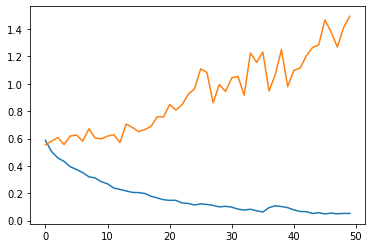

In [90]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

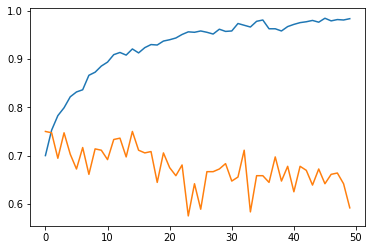

In [91]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])